In [1]:


!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib 



  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\sud4d\AppData\Local\Temp\pip-install-8mqc76fi\tensorflow-gpu_265048c95fb141d2bc87d8b82824663f\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not


     ---------------------------------------- 1.5/1.5 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl (38.1 MB)
     ---------------------------------------- 125.7/125.7 kB ? eta 0:00:00
     ---------------------------------------- 7.7/7.7 MB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 7.4/7.4 MB 6.2 MB/s eta 0:00:00
     ---------------------------------------- 24.5/24.5 MB 7.4 MB/s eta 0:00:00
  Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl (895 kB)
     ---------------------------------------- 38.0/38.0 MB 9.0 MB/s eta 0:00:00
     ---------------------------------------- 46.0/46.0 kB ? eta 0:00:00
     ------------------------------------- 313.3/313.3 kB 18.9

In [4]:
import os
import time
import uuid
import cv2
import matplotlib.pyplot as plt
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'


In [5]:
import torch
from torch import nn
import math

import torchvision
import torchvision.transforms as transforms
import numpy as np
import tensorflow as tf
import json

In [3]:
torch.manual_seed(473)
device=""
if torch.cuda.is_available():
    device=torch.device("cuda")
else:
    device=torch.device("cpu")
device

device(type='cpu')

In [27]:
def createdir(path):
    #print(path)
    os.mkdir(os.path.join(path,'images'))
    os.mkdir(os.path.join(path,'labels'))

def createstore(store):    
    os.mkdir(os.path.join(store))
    createdir(os.path.join(store))
    split=['train','test','val']
    for s in split:
        os.mkdir(os.path.join(store,s))
        createdir(os.path.join(store,s))

In [68]:
#createstore('data')

In [69]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [31]:
def generatedataimages():
    cap = cv2.VideoCapture(0)
    for imgnum in range(number_images):
        print('Collecting image {}'.format(imgnum))
        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
        cv2.imwrite(imgname, frame)
        cv2.imshow('frame', frame)
        time.sleep(0.5)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [36]:
generatedataimages()
#import labelme
#labelme

In [71]:
imtf= tf.data.Dataset.list_files('data\\images\\*.jpg')
#imtf.as_numpy_iterator().next()


imtf = imtf.map(load_image)

image_generator = imtf.batch(4).as_numpy_iterator()
plot_images = image_generator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    #print(image)
    ax[idx].imshow(image) 
plt.show()

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: data\\images\\*.jpg'

In [35]:
def getdataset(path,ftype='.jpeg'):
    dataset=[]
    for imgfile in os.listdir(os.path.join(path)):
        dataset.append(torchvision.io.read_image(os.path.join(path,imgfile)))
    return dataset
#images=getdataset(os.path.join('data','images'))

In [83]:
class Customdata(torch.utils.data.Dataset):
  def __init__(self,tset,transform=None):
    self.dat=tset
    self.transform=transform
  def __len__(self):
    return len(self.dat)
  def __getitem__(self,index):
    img=self.dat[index]
    if self.transform:
      img=self.transform(self.dat[index]/255)
    else:
        pass
    return (img)

In [52]:
transform=None#transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size=4
dataset=Customdata(images,transform)
dataloader=torch.utils.data.DataLoader(dataset,batch_size=batch_size,shuffle=False)

In [53]:
def imshow(img):
    #img = img / 255 #2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
#imshow(next(iter(dataset)))
iterator=iter(dataloader)

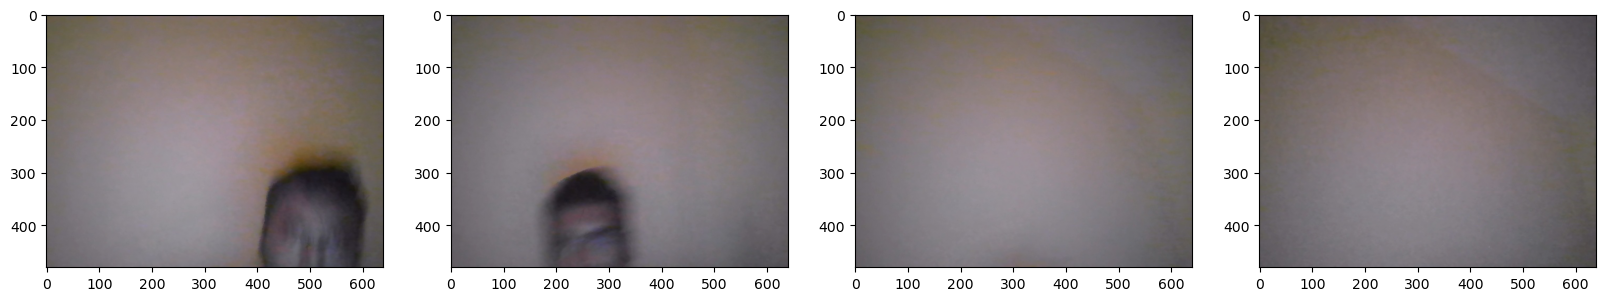

In [56]:
plot_images = next(iterator)
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    #print(image)
    ax[idx].imshow(np.transpose(image.numpy(), (1, 2, 0)))
plt.show()

In [59]:
#train,val,test
60*0.7,60*.15,60*0.1

(42.0, 9.0, 6.0)

In [60]:
def splitdata():
    for folder in ['train','test','val']:
        for file in os.listdir(os.path.join('data', folder, 'images')):

            filename = file.split('.')[0]+'.json'
            existing_filepath = os.path.join('data','labels', filename)
            if os.path.exists(existing_filepath): 
                new_filepath = os.path.join('data',folder,'labels',filename)
                os.replace(existing_filepath, new_filepath)

In [3]:
#import albumentations as alb

augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))


In [16]:
imn='1b3bceeb-81b5-11ee-b111-60f262a4d79b'
img = cv2.imread(os.path.join('data','train','images', imn+'.jpg'))
with open(os.path.join('data', 'train', 'labels', imn+'.json'), 'r') as f:
    label = json.load(f)
label['shapes'][0]['label'],label['shapes'][0]['points']

('face', [[207.5, 79.42307692307696], [459.4230769230769, 396.7307692307693]])

In [18]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

coords = list(np.divide(coords, [640,480,640,480]))

In [19]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])


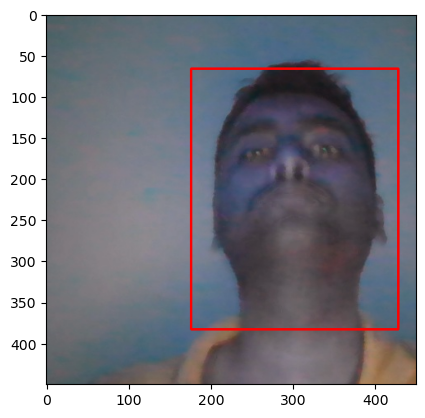

In [20]:

cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])


In [29]:
#createstore('aug_data')


for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)



x_max is less than or equal to x_min for bbox [0.51953125, 0.9947916666666666, 0.017728365384615398, 0.36578525641025644, 'face'].


In [33]:


train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)



val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)



train_images.as_numpy_iterator().next().shape



(120, 120, 3)

In [84]:
batch_size=4
imagetrain=getdataset(os.path.join('aug_data','train','images'))
imagetest=getdataset(os.path.join('aug_data','test','images'))
imageval=getdataset(os.path.join('aug_data','val','images'))

In [85]:
trainset=Customdata(imagetrain,transforms.Compose([torchvision.transforms.Resize(size=120)]))
testset=Customdata(imagetest,transforms.Compose([torchvision.transforms.Resize(size=120)]))
valset=Customdata(imageval,transforms.Compose([torchvision.transforms.Resize(size=120)]))




In [56]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [62]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels.as_numpy_iterator().next()

b'aug_data\\train\\labels\\19fec88e-81b5-11ee-8ff2-60f262a4d79b.0.json'

In [63]:
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.1577, 0.439 , 0.6064, 1.    ], dtype=float16))

In [76]:
def getlabels(path):
    labelset=[]
    for id in os.listdir(os.path.join(path)):
        with open(os.path.join(path,id), 'r', encoding = "utf-8") as f:
            label = json.load(f)
            labelset.append((label['class'],label['bbox']))
    return labelset


(1, [0.1576923076923077, 0.4388888888888889, 0.6064102564102565, 1.0])

In [86]:
trainlabel=getlabels(os.path.join('aug_data','train','labels'))
testlabel=getlabels(os.path.join('aug_data','test','labels'))
vallabel=getlabels(os.path.join('aug_data','val','labels'))

In [114]:
def combinedatalabel(dataset,labelset):
    dset=[]
    for a,b in zip(dataset,labelset):
        dset.append((a,b))
        #print(b)
    return Customdata(dset)

In [115]:
trainloader=torch.utils.data.DataLoader(combinedatalabel(trainset,trainlabel),batch_size=batch_size,shuffle=False)
testloader=torch.utils.data.DataLoader(combinedatalabel(testset,testlabel),batch_size=batch_size,shuffle=False)
valloader=torch.utils.data.DataLoader(combinedatalabel(valset,vallabel),batch_size=batch_size,shuffle=False)
iterator=iter(trainloader)


In [174]:
import matplotlib.patches as patches

(array([ 0, 38]), array([22, 19]))
(array([3, 9]), array([37,  2]))
(array([ 54, 101]), array([85, 82]))
(array([80, 86]), array([115,  79]))


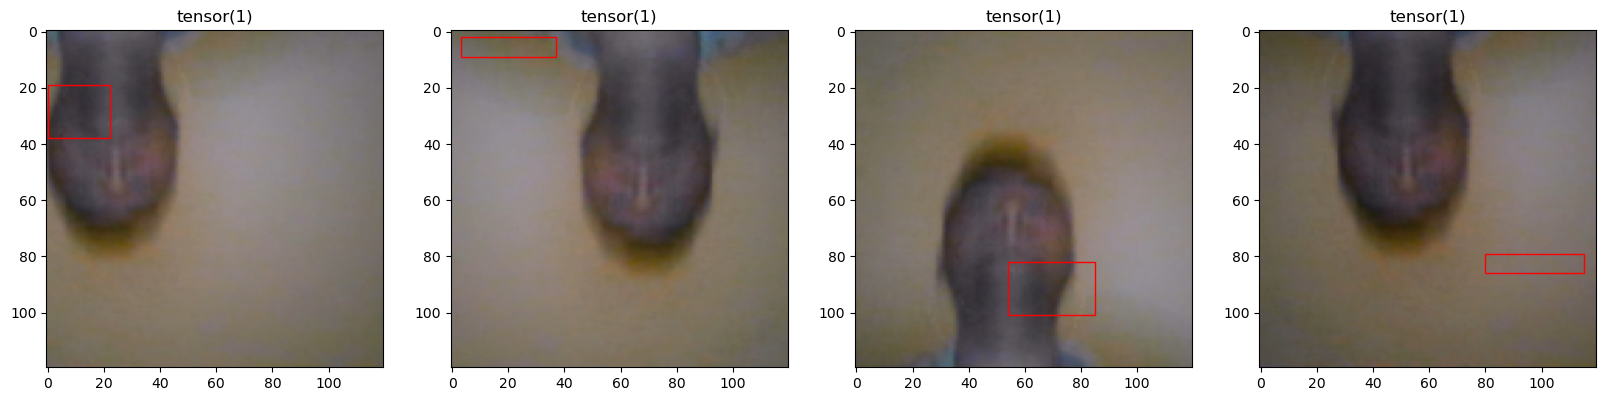

In [196]:
plot_images = next(iterator)
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images[0]):
    #print(image)
    
    ax[idx].imshow(np.transpose(image.numpy(), (1, 2, 0)))
    
    rect1=np.multiply(plot_images[1][1][idx].numpy()[:2], [120,120]).astype(int)
    rect2=np.multiply(plot_images[1][1][idx].numpy()[2:], [120,120]).astype(int)
    print((rect1,rect2))
    rect = patches.Rectangle(rect2, (rect1-rect2)[0],(rect1-rect2)[1], linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
    ax[idx].add_patch(rect)
    ax[idx].set_title(plot_images[1][0][idx])
plt.show()


In [197]:
#data_samples = iter(trainloader)
#res=next(data_samples)
#tuple(np.multiply(res[1][1][3].numpy()[:2],[1,1]).astype(int))

#train_images.as_numpy_iterator().next().shape,np.transpose(res[0][0].numpy(), (1, 2, 0)).shape

In [204]:


#vgg = torchvision.models.vgg16()
def build_model(): 

    # Classification Model  
    f1 = torch.nn.functional.max_pool2d(vgg,kernel_size=vgg.size()[2:])
    class1 = torch.nn.Dense(2048, activation='relu')(f1)
    class2 = torch.nn.Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = torch.nn.functional.max_pool2d(vgg)
    regress1 = torch.nn.Dense(2048, activation='relu')(f2)
    regress2 = torch.nn.Dense(4, activation='sigmoid')(regress1)
    
    facetracker = torch.nn.Sequential(vgg,f1,class1,class2)
    return facetracker




In [205]:
import torch.nn.functional as F
from torch.utils.data import Dataset
from torchvision import models

class VGG16DualHead(nn.Module):
    def __init__(self, freezevgg=True, device=None):
        super().__init__()
        # Pre-trained VGG16 with an additional convlayer.
        self.vgg16_base = models.vgg16(weights="DEFAULT").features
        if freezevgg:
            for p in self.vgg16_base.parameters():
                p.requires_grad = False
        self.cn2 = nn.Conv2d(512, 32, kernel_size=(3, 3))

        # Head 1: Bounding box
        self.bbox_dense1 = nn.Linear(800, 512)
        self.bbox_dense2 = nn.Linear(512, 4)

        # Head 2: Conviction of seeing a face
        self.conviction_dense1 = nn.Linear(800, 512)
        self.conviction_dense2 = nn.Linear(512, 1)

        if device is not None:
            self.to(device)

    # Expects input shape of either (batch_size, 3, 244, 244)
    def forward(self, x):
        """x: Image data as tensors of shape (batch_size, 3, 244, 244) or (3, 244, 244), for a single sample.

        Returns tensor of shape (n, 5) or (n,)."""
        x = self.vgg16_base(x)  # (n, 512, 7, 7)
        x = self.cn2(x)  # (n, 32, 5, 5)
        x = F.relu(x)  # (n, 32, 5, 5)
        x = torch.flatten(x, -3)  # (n, 800)

        # Head 1: Bounding box
        bbox = self.bbox_dense1(x)  # (n, 512)
        bbox = F.relu(bbox)  # (n, 512)
        bbox = self.bbox_dense2(bbox)  # (n, 4)
        bbox = torch.sigmoid(bbox)  # (n, 4)

        # Head 2: Conviction, that there is a face
        conviction = self.conviction_dense1(x)  # (n, 512)
        conviction = F.relu(conviction)  # (n, 512)
        conviction = self.conviction_dense2(conviction)  # (n, 1)
        conviction = torch.sigmoid(conviction)  # (n, 1)

        result = torch.cat((bbox, conviction), dim=-1)  # (n, 5)
        return result

    def summary(self, input_size=(32, 3, 224, 224)):
        """Helper for determining the expected output shapes given an input"""
        # Pytorch uses dynamic computational graphs, whose tensor dimensions depend on
        # the shape of the input data. In order to get a listing of concrete layer
        # dimensions, a specific input shape has to be specified. See
        # https://ai.stackexchange.com/questions/3801
        torchinfo.summary(self, input_size=input_size)

    @staticmethod
    def from_state_dict_pth(fpath, device=None):
        """Helper function to initialize a model from a saved state dict."""
        state_dict = torch.load(fpath)
        model = VGG16DualHead(device=device)
        model.load_state_dict(state_dict)
        if device is not None:
            model.to(device)
        return model